<a href="https://colab.research.google.com/github/alminha021/DS-rcf/blob/main/VC_ex3_rcf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instopencv
!pip install opencv-python
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt


In [ ]:
uploaded = files.upload()
for filename in uploaded.keys():
    img = cv2.imread(filename)
    break


Saving baixo_contraste.png to baixo_contraste (9).png


1. Implemente histograma dos tons de cinza da imagem abaixo:
2. Implemente a transformação linear mostrada na Eq. 1. dos slides (Realce -
Transformações de contraste)

f_min: 7 f_max: 233


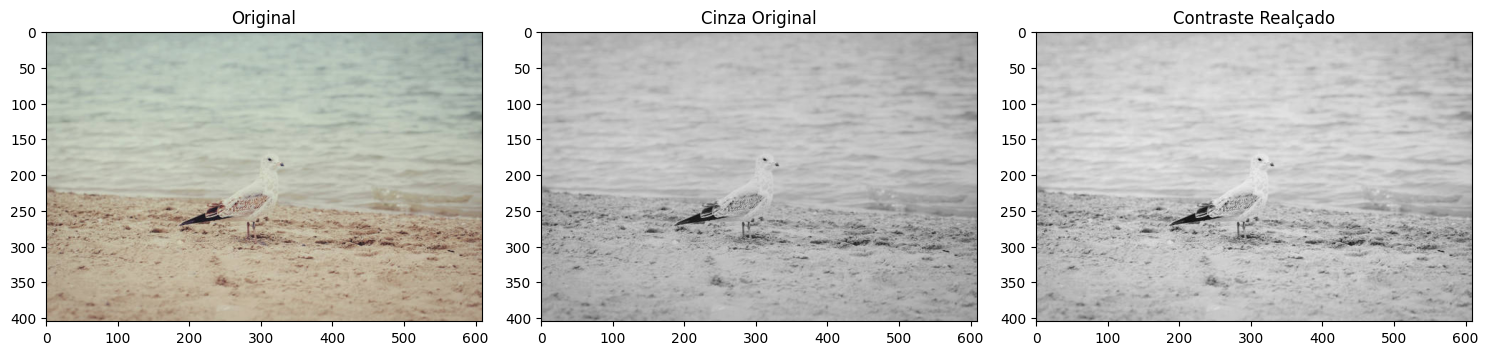

In [ ]:
#cv2.COLOR_BGR2GRAY -> cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#f_min f_max
f_min = np.min(gray)
f_max = np.max(gray)
print("f_min:", f_min, "f_max:", f_max)

# formula, ajusta o f para "alargar" de 0 a255
g_min, g_max = 0, 255
contrast = ((gray.astype(np.float32) - f_min) * (g_max - g_min) / (f_max - f_min)) + g_min
contrast = np.clip(contrast, 0, 255).astype(np.uint8)

# ployt
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Cinza Original")
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 3)
plt.title("Contraste Realçado")
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()
plt.show()

# Calcular histogramas,
histograma_cinza = cv2.calcHist([gray], [0], None, [256], [0, 256]).flatten()
histograma_contraste = cv2.calcHist([contrast], [0], None, [256], [0, 256]).flatten()

In [ ]:

def calcular_histograma(imagem):
    Lmax = 255
    H = [0] * (Lmax + 1)
    M, N = imagem.shape
    for x in range(M):
        for y in range(N):
            intensidade = imagem[x, y]
            H[intensidade] += 1
    return H


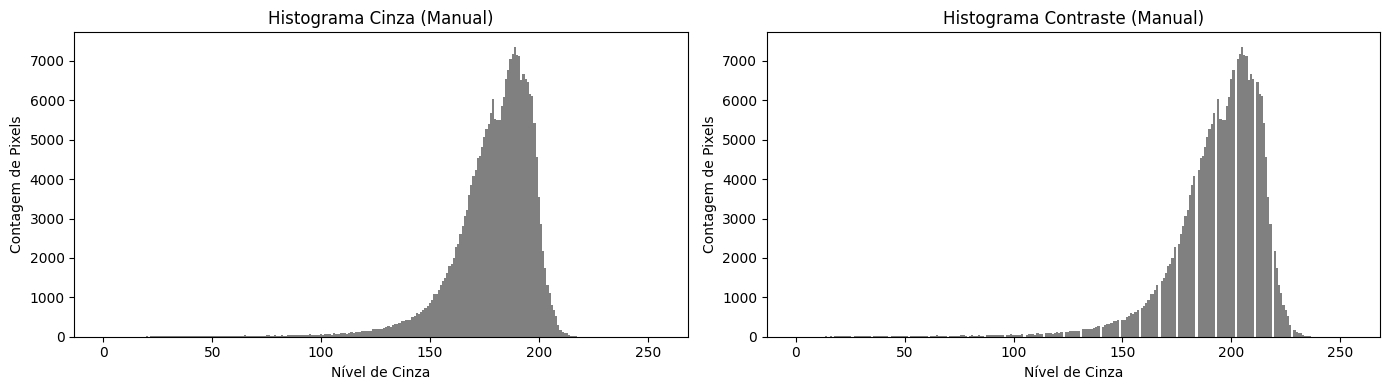

In [ ]:
hist_cinza = calcular_histograma(gray)
hist_contraste = calcular_histograma(contrast)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.title("Histograma Cinza (Manual)")
plt.xlabel("Nível de Cinza")
plt.ylabel("Contagem de Pixels")
plt.bar(range(256), hist_cinza, width=1.0, color='gray')

plt.subplot(1, 2, 2)
plt.title("Histograma Contraste (Manual)")
plt.xlabel("Nível de Cinza")
plt.ylabel("Contagem de Pixels")
plt.bar(range(256), hist_contraste, width=1.0, color='gray')

plt.tight_layout()
plt.show()

3. Implemente as transformações de contraste não-lineares:
a. Logaritmo
b. Raiz quadrada
c. Exponencial
d. Quadrado.

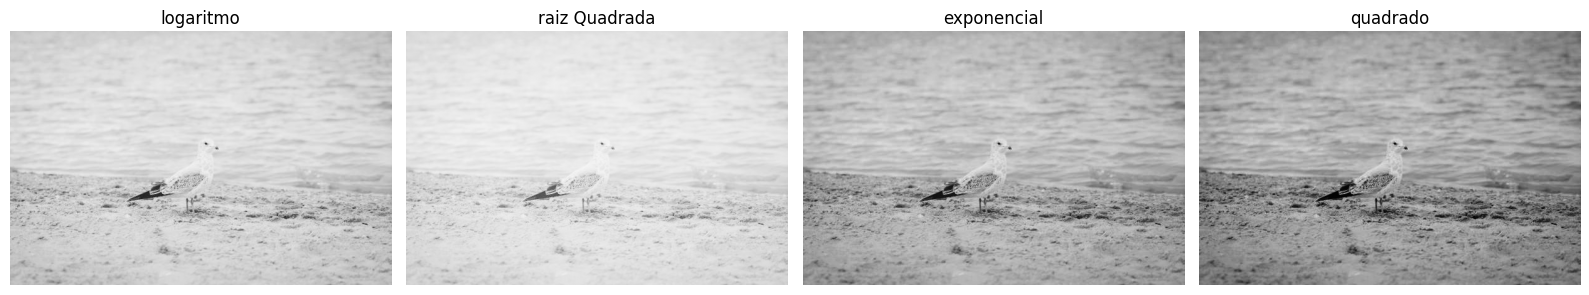

In [ ]:
#if 'gray' not in locals():
#    raise ValueError("Imagem 'gray' não encontrada. Execute a célula anterior primeiro.")

# Normalizar
gray_norm = gray.astype(np.float32) / 255.0

# transformações de contraste não-linear Logaritma
log_img = np.log1p(gray_norm)  # log(1 + x)
log_img = (log_img / log_img.max()) * 255
log_img = log_img.astype(np.uint8)

# transformações de contraste não-linear raiz quadrada
sqrt_img = np.sqrt(gray_norm)
sqrt_img = (sqrt_img / sqrt_img.max()) * 255
sqrt_img = sqrt_img.astype(np.uint8)

# transformações de contraste não-linear exponencial
exp_img = np.exp(gray_norm) - 1
exp_img = (exp_img / exp_img.max()) * 255
exp_img = exp_img.astype(np.uint8)

# transformações de contraste não-linear Quadraddo
power_img = np.power(gray_norm, 2)
power_img = (power_img / power_img.max()) * 255
power_img = power_img.astype(np.uint8)

# Mostrar resultados
titles = ['logaritmo', 'raiz Quadrada', 'exponencial', 'quadrado']
images = [log_img, sqrt_img, exp_img, power_img]

plt.figure(figsize=(16, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
plt.tight_layout()
plt.show()



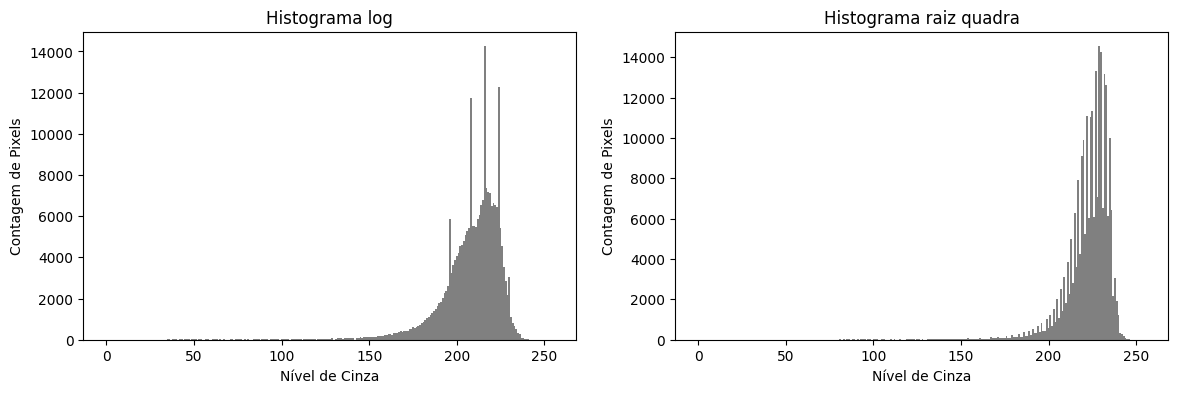

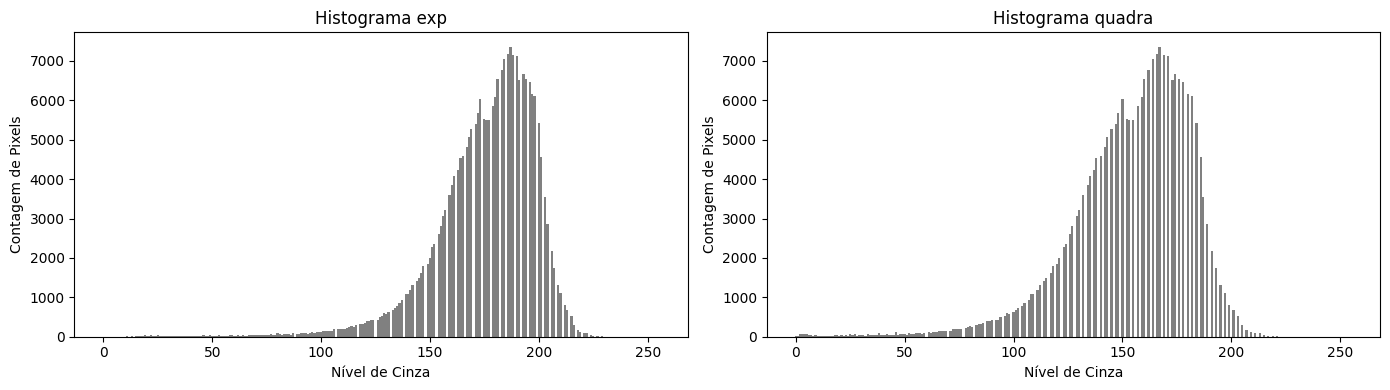

In [ ]:
#histogramas
hist_log = calcular_histograma(log_img)
hist_sqrt = calcular_histograma(sqrt_img)
hist_exp = calcular_histograma(exp_img)
hist_power = calcular_histograma(power_img)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.title("Histograma log")
plt.xlabel("Nível de Cinza")
plt.ylabel("Contagem de Pixels")
plt.bar(range(256), hist_log, width=1.0, color='gray')

plt.subplot(1, 2, 2)
plt.title("Histograma raiz quadra")
plt.xlabel("Nível de Cinza")
plt.ylabel("Contagem de Pixels")
plt.bar(range(256), hist_sqrt, width=1.0, color='gray')

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.title("Histograma exp")
plt.xlabel("Nível de Cinza")
plt.ylabel("Contagem de Pixels")
plt.bar(range(256), hist_exp, width=1.0, color='gray')

plt.subplot(1, 2, 2)
plt.title("Histograma quadra")
plt.xlabel("Nível de Cinza")
plt.ylabel("Contagem de Pixels")
plt.bar(range(256), hist_power, width=1.0, color='gray')

plt.tight_layout()
plt.show()
